# 根据大小选择标签
在对图像进行分割并标记对象后，我们可能想要删除那些太小或太大而不能被视为对象（例如细胞核）的标签。

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread
import matplotlib
import numpy as np
import stackview

# initialize GPU
cle.select_device("GTX")

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier0\_device.py:77: UserWarning: No OpenCL device found with GTX in their name. Using gfx1035 instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<gfx1035 on Platform: AMD Accelerated Parallel Processing (2 refs)>

我们从斑点图像的标记版本开始。

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
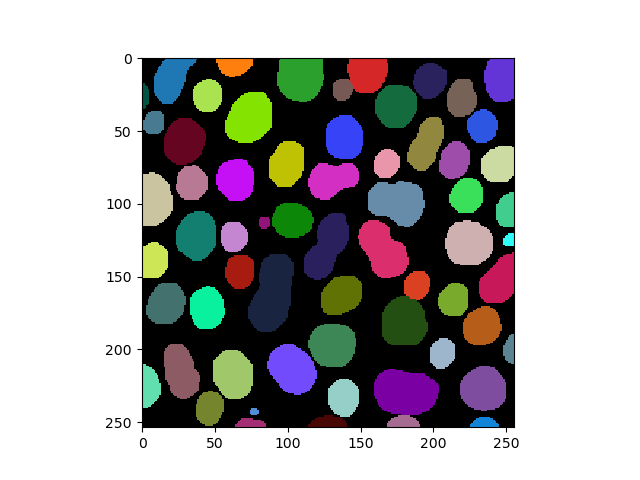

In [2]:
# load data
label_image = imread('../../data/blobs_labeled.tif')

stackview.insight(label_image)

假设我们对非常小的对象不感兴趣，因为它们可能是由噪声错误分割产生的。我们知道我们成像的对象有一定的最小尺寸。根据这个物理推测，我们需要估计对象在2D中的像素数或3D中的体素数。然后我们可以使用这个数字作为像素或体素的`size_threshold`。

cl.OCLArray([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
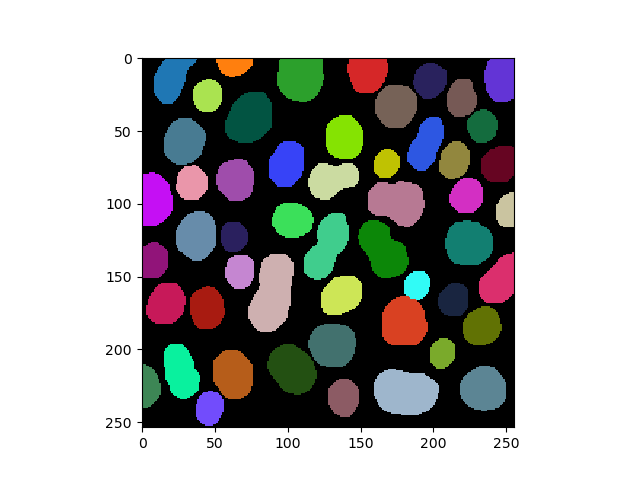

In [3]:
size_threshold = 200 # pixels

large_labels_only = cle.exclude_small_labels(label_image, maximum_size=size_threshold)

large_labels_only

我们可以使用类似的函数在单独的标签图像中可视化上面被移除的对象。

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
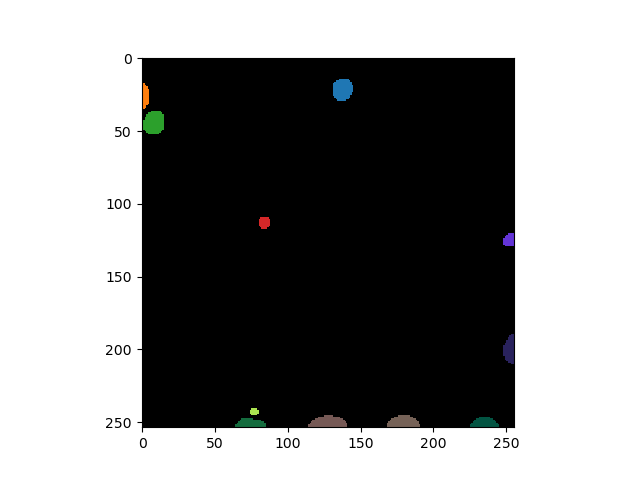

In [4]:
small_labels_only = cle.exclude_large_labels(label_image, minimum_size=size_threshold)

small_labels_only